# Bank of England Sentiment Analysis
## Employer Project
### Team 8 AnalytIQ, June 2nd, 2025
**Team Members**: Lalitha Vemuri, Christina Tsoulfa, Reka Bodo, Yann Hirsig, Louis Pang, Dr. Karin Agius Ferrante

## Content
1. Approach
2. Load the Data
3. Exploratory Sentiment Analysis for full data set
4. Exploratory Sentiment Analysis for BoE Speeches only
5. Exploratory Analysis for Correlation with Economic Indicators
6. Insights & Recommendations

## 1. Approach

The **Bank of England (BoE)**, the UK’s central bank and one of the world’s leading financial institutions, plays a pivotal role in maintaining economic and financial stability, and supporting the UK government’s economic policies. One of its key communication channels with the public and markets is through formal speeches delivered by its representatives. These speeches aim to offer guidance, manage expectations, and provide clarity in times of uncertainty.

However, the effectiveness and impact of these speeches on economic indicators and market behaviour are not fully understood. 

This project seeks to explore whether the sentiment and timing of BoE speeches hold analytical or predictive value, when compared with economic performance and key events.

### Main Business Questions
**Has the tone or sentiment of the BoE’s speeches evolved over time? If so, how?**<br>
**How do sentiments align with events like interest rate changes, policy reports, or major economic releases?**

**Sub-questions**

1.	Are there measurable correlations between speech sentiment and UK economic indicators such as inflation, GDP, employment rates and bond yields?
2. Does the change in sentiment change economic indicators or is the speech sentiment reactive to economic indicators?
3. Can speech sentiment trends be used to predict market reactions or economic outcomes?
4. What broader insights can be drawn to support data-informed communication strategies?

## 2. Load the Data

- All speeches CSV file (all_speeches.csv)
- Sentiment wordlist Excel file (Sentiment-labelled_wordlist-2.xlsx)

### 2.1. Import libraries

In [128]:
# Import relevant libraries.
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
from scipy import stats
from sklearn.preprocessing import PowerTransformer

In [12]:
# Text and Sentiment Analysis 
from wordcloud import WordCloud                                       # Generating visual word frequency clouds from text.
import nltk                                                           # Natural language processing tasks.
from nltk import word_tokenize, pos_tag                               # Splitting text into words and tags with part of speech
from nltk import defaultdict                                          # Providing default values for nonexistent keys.
from nltk.probability import FreqDist                                 # Calculating frequency distribution of tokens.
from nltk.corpus import stopwords                                     # Providing list of common words to exclude from analysis.
from nltk.corpus import words
from nltk.corpus import wordnet as wn                                 # Lexical database for retrieving word relationships & meanings.
from nltk.stem import WordNetLemmatizer, PorterStemmer                # Reducing words to base or root form.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer  # Assessing sentiment intensity in text.
from textblob import TextBlob                                         # API for text processing tasks including sentiment analysis.
import contractions                                                   # Expanding/contracting text contractions.
import re                                                             # Regular expression operations on strings.
from collections import defaultdict  # Creating dictionaries that return default value for nonexistent keys.
from collections import Counter  # Importing Counter for counting hashable objects and efficiently tallying occurrences in an iterable.

stop_words = set(stopwords.words('english'))

# Ensure required NLTK resources are present (quiet=True => no console spam)
for pkg in [
    "punkt",
    "stopwords",
    "vader_lexicon",
]:
    nltk.download(pkg, quiet=True)

import warnings
warnings.filterwarnings("ignore")

### 2.2. Import the data

In [14]:
# Import necessary libraries
import pandas as pd
from IPython.display import display

def load_data(speeches_path: str, sentiment_path: str):
    """
    Load speeches and sentiment wordlist datasets.

    Parameters:
    speeches_path (str): Path to the speeches CSV file.
    sentiment_path (str): Path to the sentiment-labelled wordlist Excel file.

    Returns:
    tuple: A tuple containing two pandas DataFrames (speeches_df, sentiment_df).
    """
    speeches_df = pd.read_csv(speeches_path)
    sentiment_df = pd.read_excel(sentiment_path)
    
    display(speeches_df.head())
    display(sentiment_df.head())
    
    return speeches_df, sentiment_df

# Paths to your files
# speeches_path = r"C:\Users\Srila\OneDrive\Documents\all_speeches.csv"
# sentiment_path = r"C:\Users\Srila\OneDrive\Documents\LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist-2 (1).xlsx"

speeches_path = r"/Users/kaferrante/Documents/Python/_Course4_Project/all_speeches.csv"
sentiment_path = r"/Users/kaferrante/Documents/Python/_Course4_Project/LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist-2.xlsx"

# Load data
speeches_df_org, sentiment_df_org = load_data(speeches_path, sentiment_path)

reference    country        date                               title  \
0  r901128a_BOA  australia  1990-11-28   A Proper Role for Monetary Policy   
1  r911003a_BOA  australia  1991-10-03                                       
2  r920314a_BOA  australia  1992-03-14                                       
3  r920529a_BOA  australia  1992-05-29                                       
4  r920817a_BOA  australia  1992-08-17                                       

   author  is_gov                                               text  
0  fraser       0  They would no doubt argue that to have two obj...  
1  fraser       0  Today I wish to talk about real interest rates...  
2  fraser       0  I welcome this opportunity to talk about prosp...  
3  fraser       0  It is a pleasure to have this opportunity to a...  
4  fraser       0  As a long-time fan of Don Sanders, I am deligh...

Word  Negative  Positive  Uncertainty  Litigious  Strong  Weak  \
0       ABANDON         1         0            0          0       0     0   
1     ABANDONED         1         0            0          0       0     0   
2    ABANDONING         1         0            0          0       0     0   
3   ABANDONMENT         1         0            0          0       0     0   
4  ABANDONMENTS         1         0            0          0       0     0   

   Constraining  
0             0  
1             0  
2             0  
3             0  
4             0

### 2.3. Explore and Clean Data

### Approach
- Check the data sets and dates
- Are dates parsed properly?
- Are speech texts clean (no missing)?
- Is the sentiment list organized (positive/negative words tagged)?

**2.3.a. Review Datasets**
- Look for missing values, review basic statistics & check data types
- Look at the structure of the speeches and sentiment files

In [17]:
def explore_data(speeches_df_org: pd.DataFrame, sentiment_df_org: pd.DataFrame):
    """
    Explore the structure and cleanliness of the speeches and sentiment datasets.

    Parameters:
    speeches_df (DataFrame): Central bank speeches.
    sentiment_df (DataFrame): Sentiment-labelled wordlist.

    Returns:
    None
    """
    print("\n--- Speeches Dataset ---\n")
    display(speeches_df_org.info())
    display(speeches_df_org.describe())
    display(speeches_df_org.isnull().sum())

    print("\n--- Sentiment Wordlist ---\n")
    display(sentiment_df_org.info())
    display(sentiment_df_org.describe())
    display(sentiment_df_org.isnull().sum())

# Run exploration
explore_data(speeches_df_org, sentiment_df_org)


--- Speeches Dataset ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7721 entries, 0 to 7720
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   reference  7721 non-null   object
 1   country    7721 non-null   object
 2   date       7721 non-null   object
 3   title      7721 non-null   object
 4   author     7721 non-null   object
 5   is_gov     7721 non-null   int64 
 6   text       7721 non-null   object
dtypes: int64(1), object(6)
memory usage: 422.4+ KB


None

is_gov
count  7721.000000
mean      0.347235
std       0.476122
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000

reference    0
country      0
date         0
title        0
author       0
is_gov       0
text         0
dtype: int64


--- Sentiment Wordlist ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3880 entries, 0 to 3879
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Word          3880 non-null   object
 1   Negative      3880 non-null   int64 
 2   Positive      3880 non-null   int64 
 3   Uncertainty   3880 non-null   int64 
 4   Litigious     3880 non-null   int64 
 5   Strong        3880 non-null   int64 
 6   Weak          3880 non-null   int64 
 7   Constraining  3880 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 242.6+ KB


None

Negative     Positive  Uncertainty    Litigious       Strong  \
count  3880.000000  3880.000000  3880.000000  3880.000000  3880.000000   
mean      0.606959     0.092268     0.076546     0.233247     0.004897   
std       0.488489     0.289441     0.265905     0.422953     0.069815   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       1.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              Weak  Constraining  
count  3880.000000   3880.000000  
mean      0.006959      0.047423  
std       0.083139      0.212569  
min       0.000000      0.000000  
25%       0.000000      0.000000  
50%       0.000000      0.000000  
75%       0.000000      0.000000  
max       1.000000      1.000000

Word            0
Negative        0
Positive        0
Uncertainty     0
Litigious       0
Strong          0
Weak            0
Constraining    0
dtype: int64

In [18]:
# Data Validation
print("\nData types:")
print(speeches_df_org.dtypes)

print("\nMissing values per column:")
print(speeches_df_org.isnull().sum())


Data types:
reference    object
country      object
date         object
title        object
author       object
is_gov        int64
text         object
dtype: object

Missing values per column:
reference    0
country      0
date         0
title        0
author       0
is_gov       0
text         0
dtype: int64


**2.3.b. Ensure dates are in the correct format**<br>
We expect that the speeches should have a column like date or similar. If yes, we'll convert it properly:

In [20]:
def clean_dates(speeches_df_org: pd.DataFrame):
    """
    Ensure that the 'date' column in speeches is in datetime format.

    Parameters:
    speeches_df (DataFrame): Central bank speeches.

    Returns:
    DataFrame: Updated speeches DataFrame with datetime parsed.
    """
    speeches_df_org['date'] = pd.to_datetime(speeches_df_org['date'], errors='coerce')
    display(speeches_df_org.head())
    return speeches_df_org

# Clean date columns
speeches_df_org = clean_dates(speeches_df_org)

reference    country       date                               title  \
0  r901128a_BOA  australia 1990-11-28   A Proper Role for Monetary Policy   
1  r911003a_BOA  australia 1991-10-03                                       
2  r920314a_BOA  australia 1992-03-14                                       
3  r920529a_BOA  australia 1992-05-29                                       
4  r920817a_BOA  australia 1992-08-17                                       

   author  is_gov                                               text  
0  fraser       0  They would no doubt argue that to have two obj...  
1  fraser       0  Today I wish to talk about real interest rates...  
2  fraser       0  I welcome this opportunity to talk about prosp...  
3  fraser       0  It is a pleasure to have this opportunity to a...  
4  fraser       0  As a long-time fan of Don Sanders, I am deligh...

In [21]:
# Data Validation
print("\nData types:")
print(speeches_df_org.dtypes)


Data types:
reference            object
country              object
date         datetime64[ns]
title                object
author               object
is_gov                int64
text                 object
dtype: object


In [22]:
# Add a new column for year and month.
speeches_df_org['year_month'] = pd.to_datetime(speeches_df_org.date).dt.strftime('%Y-%m')

# Add a new column for year only.
speeches_df_org['year'] = pd.to_datetime(speeches_df_org.date).dt.year

# Add a new column for month only.
speeches_df_org['month'] = pd.to_datetime(speeches_df_org.date).dt.month

# View the DataFrame.
speeches_df_org.head()

reference    country       date                               title  \
0  r901128a_BOA  australia 1990-11-28   A Proper Role for Monetary Policy   
1  r911003a_BOA  australia 1991-10-03                                       
2  r920314a_BOA  australia 1992-03-14                                       
3  r920529a_BOA  australia 1992-05-29                                       
4  r920817a_BOA  australia 1992-08-17                                       

   author  is_gov                                               text  \
0  fraser       0  They would no doubt argue that to have two obj...   
1  fraser       0  Today I wish to talk about real interest rates...   
2  fraser       0  I welcome this opportunity to talk about prosp...   
3  fraser       0  It is a pleasure to have this opportunity to a...   
4  fraser       0  As a long-time fan of Don Sanders, I am deligh...   

  year_month  year  month  
0    1990-11  1990     11  
1    1991-10  1991     10  
2    1992-03  1992      3  
3    1992-05  1992      5  
4    1992-08  1992      8

In [23]:
# Identify speech length.    
speeches_df_org['speech_length'] = speeches_df_org['text'].str.split().apply(len)

# View the DataFrame.
speeches_df_org.head()

reference    country       date                               title  \
0  r901128a_BOA  australia 1990-11-28   A Proper Role for Monetary Policy   
1  r911003a_BOA  australia 1991-10-03                                       
2  r920314a_BOA  australia 1992-03-14                                       
3  r920529a_BOA  australia 1992-05-29                                       
4  r920817a_BOA  australia 1992-08-17                                       

   author  is_gov                                               text  \
0  fraser       0  They would no doubt argue that to have two obj...   
1  fraser       0  Today I wish to talk about real interest rates...   
2  fraser       0  I welcome this opportunity to talk about prosp...   
3  fraser       0  It is a pleasure to have this opportunity to a...   
4  fraser       0  As a long-time fan of Don Sanders, I am deligh...   

  year_month  year  month  speech_length  
0    1990-11  1990     11           3627  
1    1991-10  1991     10           3054  
2    1992-03  1992      3           3399  
3    1992-05  1992      5           3841  
4    1992-08  1992      8           4152

## 3. Exploratory Sentiment Analysis of full dataset

### Next steps:

Preprocess text a little (basic cleaning).

Apply sentiment scoring using your wordlist.

Start time series sentiment analysis.

We need to:

Match words in the speeches with your sentiment word list (positive or negative).

Calculate a simple Sentiment Score for each speech.

### 3.1. Text Cleaning
Clean the text a little (lowercase, remove symbols if needed).

In [29]:
# Create copy of the dataframe for data cleaning and exploration.
speeches_df = speeches_df_org.copy()
sentiment_df = sentiment_df_org.copy()

In [30]:
# Check columns in speeches dataset
print(speeches_df.columns)

Index(['reference', 'country', 'date', 'title', 'author', 'is_gov', 'text',
       'year_month', 'year', 'month', 'speech_length'],
      dtype='object')


**3.1.a. Correct a mistake**:
- Edward George was Governor from 1993 to 2003.
- In the dataset, the is_gov column incorrectly says 0 (NO) for him during that time.

**A quick summary of the cleaning process**:
- We first convert date to datetime, just in case it isn't yet.
- .str.lower() ensures case-insensitive matching ("George", "george", etc.).
- .loc[condition, 'is_gov'] = 1 assigns Governor status (YES).
- Then we display some George rows to verify!
- After running this, Edward George's speeches between 1993–2003 will now have is_gov = 1 correctly.

In [33]:
def correct_is_gov_column(speeches_df: pd.DataFrame):
    """
    Correct the 'is_gov' value for Edward George between 1993 and 2003.

    Parameters:
    speeches_df (DataFrame): Central bank speeches.

    Returns:
    DataFrame: Updated speeches DataFrame with corrected 'is_gov' values.
    """
    # Make sure date is datetime first
    speeches_df['date'] = pd.to_datetime(speeches_df['date'], errors='coerce')
    
    # Apply correction
    condition = (
        (speeches_df['author'].str.lower() == 'george') &
        (speeches_df['date'].dt.year > 1993) &
        (speeches_df['date'].dt.year < 2004)
    )
    speeches_df.loc[condition, 'is_gov'] = 1  # 1 means Governor
    
    return speeches_df

# Correct the is_gov column
speeches_df = correct_is_gov_column(speeches_df)

# Quick check if it worked
display(speeches_df[speeches_df['author'].str.lower() == 'george'].head())

reference         country       date              title  author  \
4961  r980915a_BOE  united kingdom 1998-09-15             Speech  george   
4962  r981021b_BOE  united kingdom 1998-10-21  Britain in Europe  george   
4966  r981119a_BOE  united kingdom 1998-11-19             Speech  george   
4969  r990112a_BOE  united kingdom 1999-01-12             Speech  george   
4970  r990118a_BOE  united kingdom 1999-01-18             Speech  george   

      is_gov                                               text year_month  \
4961       1  Thank you, Chairman. I'm actually very pleased...    1998-09   
4962       1  It's a great pleasure to be here in the beauti...    1998-10   
4966       1  Let me put some of the recent newspaper headli...    1998-11   
4969       1  I am only too well aware of the pressure curre...    1999-01   
4970       1  It would be a masterly understatement to descr...    1999-01   

      year  month  speech_length  
4961  1998      9           2387  
4962  1998     10           4045  
4966  1998     11           2363  
4969  1999      1           2550  
4970  1999      1           2434

**3.1.b Full text cleaning**

In [35]:
# Check what columns exist in your speeches dataframe
print(speeches_df.columns.tolist())

['reference', 'country', 'date', 'title', 'author', 'is_gov', 'text', 'year_month', 'year', 'month', 'speech_length']


In [36]:
# Check what columns exist in your sentiment dataframe
print(sentiment_df.columns.tolist())

['Word', 'Negative', 'Positive', 'Uncertainty', 'Litigious', 'Strong', 'Weak', 'Constraining']


In [37]:
# Define the cleaning function
def clean_text(text):
    """
    Cleans input text by removing non-alphabetical characters and converting to lowercase.

    Args:
        text (str): Raw text.

    Returns:
        str: Cleaned text.
    """
    text = re.sub(r'[^A-Za-z\s]', '', str(text))  # Remove non-letters
    text = text.lower()  # Lowercase
    return text


In [38]:
# Clean the text column
# Set the correct speech text column
speech_text_column = 'text'

# Clean the speech text
speeches_df['cleaned_text'] = speeches_df[speech_text_column].apply(clean_text)

# View the dataframe.
speeches_df.head()

reference    country       date                               title  \
0  r901128a_BOA  australia 1990-11-28   A Proper Role for Monetary Policy   
1  r911003a_BOA  australia 1991-10-03                                       
2  r920314a_BOA  australia 1992-03-14                                       
3  r920529a_BOA  australia 1992-05-29                                       
4  r920817a_BOA  australia 1992-08-17                                       

   author  is_gov                                               text  \
0  fraser       0  They would no doubt argue that to have two obj...   
1  fraser       0  Today I wish to talk about real interest rates...   
2  fraser       0  I welcome this opportunity to talk about prosp...   
3  fraser       0  It is a pleasure to have this opportunity to a...   
4  fraser       0  As a long-time fan of Don Sanders, I am deligh...   

  year_month  year  month  speech_length  \
0    1990-11  1990     11           3627   
1    1991-10  1991     10           3054   
2    1992-03  1992      3           3399   
3    1992-05  1992      5           3841   
4    1992-08  1992      8           4152   

                                        cleaned_text  
0  they would no doubt argue that to have two obj...  
1  today i wish to talk about real interest rates...  
2  i welcome this opportunity to talk about prosp...  
3  it is a pleasure to have this opportunity to a...  
4  as a longtime fan of don sanders i am delighte...

### 3.2. Sentiment Analysis

In [40]:
# Define sentiment word preparation
def prepare_sentiment_wordlists(sentiment_df):
    """
    Prepare sets of positive and negative words from the sentiment dataframe.

    Args:
        sentiment_df (pd.DataFrame): Sentiment-labeled words.

    Returns:
        tuple: Positive words set, negative words set.
    """
    positive_words = set(sentiment_df[sentiment_df['Positive'] == 1]['Word'].str.lower())
    negative_words = set(sentiment_df[sentiment_df['Negative'] == 1]['Word'].str.lower())
    return positive_words, negative_words

# Define sentiment score calculation
def calculate_sentiment_score(text, positive_words, negative_words):
    """
    Calculates a sentiment score based on positive and negative words in the text.

    Args:
        text (str): Cleaned text.
        positive_words (set): Set of positive words.
        negative_words (set): Set of negative words.

    Returns:
        int: Sentiment score (positive count - negative count).
    """
    words = text.split()
    pos_count = sum(word in positive_words for word in words)
    neg_count = sum(word in negative_words for word in words)
    return pos_count - neg_count

In [41]:
# Prepare sentiment wordlists
positive_words, negative_words = prepare_sentiment_wordlists(sentiment_df)

# Calculate sentiment scores
speeches_df['sentiment_score'] = speeches_df['cleaned_text'].apply(
    lambda text: calculate_sentiment_score(text, positive_words, negative_words)
)

# Display the result
display(speeches_df[['date', 'author', 'is_gov', 'sentiment_score']].head())

date  author  is_gov  sentiment_score
0 1990-11-28  fraser       0              -38
1 1991-10-03  fraser       0              -29
2 1992-03-14  fraser       0               22
3 1992-05-29  fraser       0              -11
4 1992-08-17  fraser       0              -12

**3.2.a Plot sentiment over time**<br>
This will show:
- Trend: Is sentiment becoming more positive or negative over the years?
- Spikes during crisis periods?

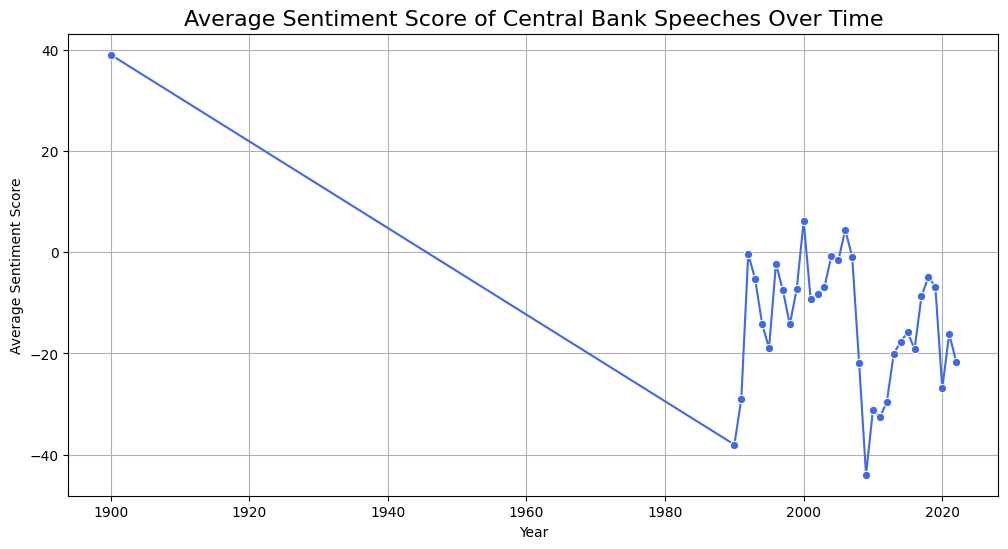

In [43]:
# Group by year and calculate average sentiment
yearly_sentiment = speeches_df.groupby(speeches_df['date'].dt.year)['sentiment_score'].mean().reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_sentiment, x='date', y='sentiment_score', marker='o', color='royalblue')
plt.title('Average Sentiment Score of Central Bank Speeches Over Time', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()

**3.2.b Outlier analysis**
- Descriptive Statistics: We'll calculate some basic descriptive statistics for the sentiment scores and other relevant numeric columns.
- Outlier Detection: We'll identify outliers using statistical methods like the Interquartile Range (IQR).
- Visualizing Outliers: We'll use boxplots to visually identify any outliers in the data.

Outliers detected:
          reference        country       date  \
40     r970812a_BOA      australia 1997-08-12   
83     r030606a_BOA      australia 2003-06-06   
151    r110211a_BOA      australia 2011-02-11   
157    r110826a_BOA      australia 2011-08-26   
244    r190809a_BOA      australia 2019-08-09   
...             ...            ...        ...   
7369  r160926a_FOMC  united states 2016-09-26   
7389  r161202a_FOMC  united states 2016-12-02   
7404  r170404a_FOMC  united states 2017-04-04   
7452  r180403a_FOMC  united states 2018-04-03   
7576  r200227a_FOMC  united states 2020-02-27   

                                                  title      author  is_gov  \
40                                                       macfarlane       1   
83                                                       macfarlane       1   
151                                                         stevens       1   
157                                                         stevens       1 

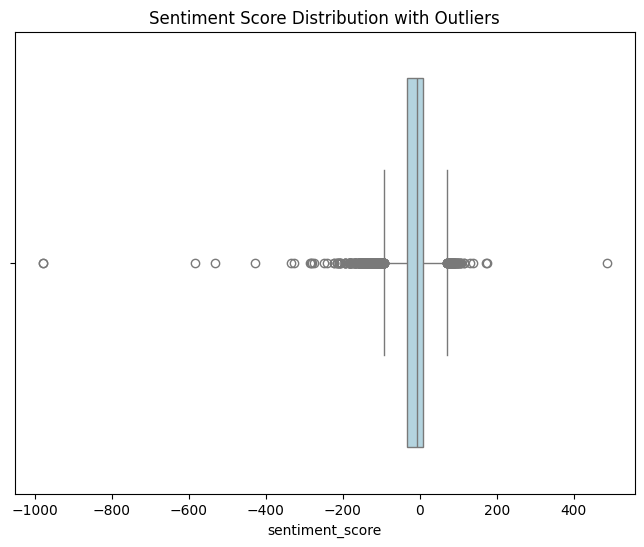

In [45]:
# Identify and visualize outliers using IQR
def detect_outliers_iqr(df, column):
    """Detect outliers using the Interquartile Range (IQR) method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Visualize outliers for 'sentiment_score'
outliers_df = detect_outliers_iqr(speeches_df, 'sentiment_score')
print("Outliers detected:")
print(outliers_df)

# Boxplot to visualize outliers
plt.figure(figsize=(8,6))
sns.boxplot(x=speeches_df['sentiment_score'], color='lightblue')
plt.title('Sentiment Score Distribution with Outliers')
plt.show()

**3.2.c. Wordcloud**<br>
visualize the most frequent words in the speeches.

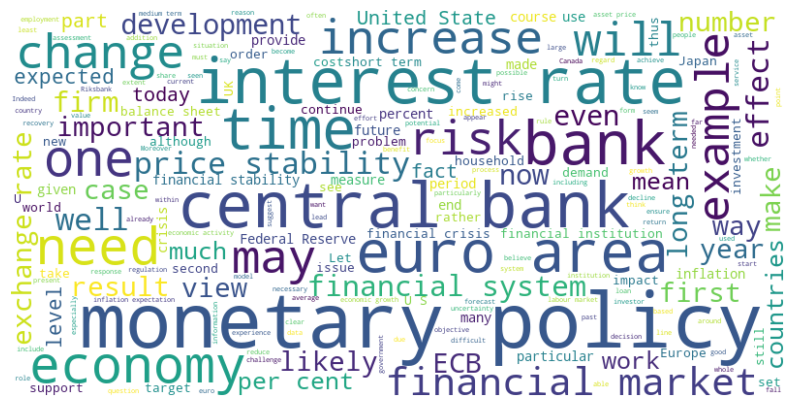

In [48]:
# Create a word cloud from the speech text
def generate_word_cloud(text_data):
    """Generate and plot a word cloud from the provided text."""
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text_data))
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generate word cloud from the speeches
generate_word_cloud(speeches_df['text'])

Wordcloud after text preparation:
- Text Processing with NLTK: Tokenize: Split the text into individual words.
- Remove stopwords: Common words like "the", "and", "is", etc. which don't add significant meaning will be removed.
- Lemmatize: Reduce words to their root form (e.g., "running" becomes "run").
- Generate Word Cloud using NLTK-processed text.

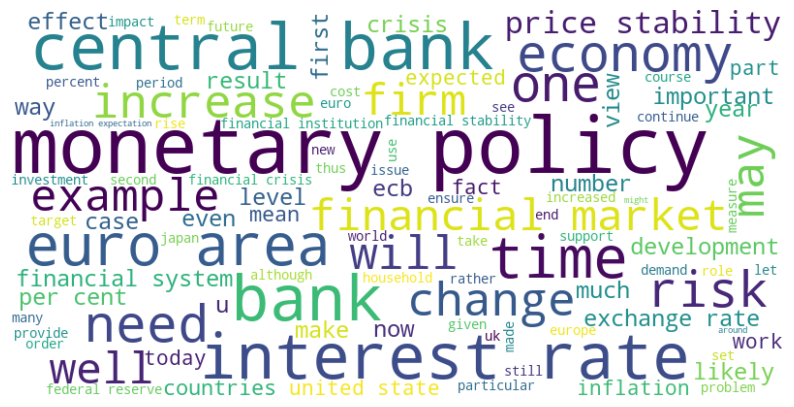

In [50]:
# Clean the text (remove any extra spaces, special characters, or stop words)
def clean_text_for_wordcloud(text):
    # Simple text cleaning: remove special characters and extra spaces
    text = str(text).lower()
    text = text.replace('\n', ' ')  # Remove line breaks
    text = ''.join(e for e in text if e.isalnum() or e.isspace())  # Keep only alphanumeric characters and spaces
    return text

# Clean the 'text' column in the dataframe
speeches_df['cleaned_text'] = speeches_df['text'].apply(clean_text_for_wordcloud)

# Combine all the speeches into a single string
all_text = ' '.join(speeches_df['cleaned_text'])

# Generate the word cloud
def generate_word_cloud(text_data):
    """Generate and plot a word cloud from the provided text."""
    wordcloud = WordCloud(width=800, height=400, background_color='white', 
                          stopwords=None, max_words=100).generate(text_data)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off axis
    plt.show()

# Generate the word cloud from cleaned text
generate_word_cloud(all_text)

## 3.3. Statistical Analysis of Sentiment Analysis

**3.3.a Heatmap to show correlation between sentiment score and year**

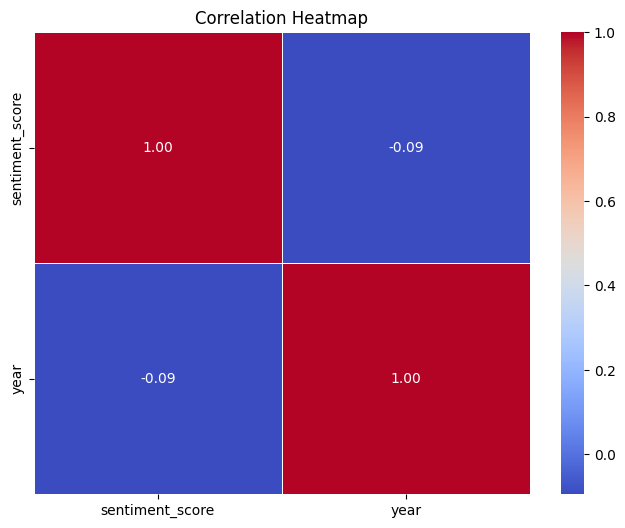

In [54]:
# Sample data (using your 'speeches_df' for example)
# If you have other numerical columns, feel free to add them to the DataFrame.
# For example, sentiment_score, date (converted to numerical), or any other relevant metrics.
speeches_df['date'] = pd.to_datetime(speeches_df['date'])  # Ensure 'date' is datetime format
speeches_df['year'] = speeches_df['date'].dt.year  # Extract year for analysis

# Compute correlations
correlation_matrix = speeches_df[['sentiment_score', 'year']].corr()

# Generate the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


**3.3.b Violin plot**<br>
A violin plot is a great way to visualize the distribution of a numerical variable (like the sentiment score) across different categories (like years, authors, or any other categorical variable). It combines aspects of both a box plot and a density plot, making it useful for understanding the distribution, spread, and outliers in the data.

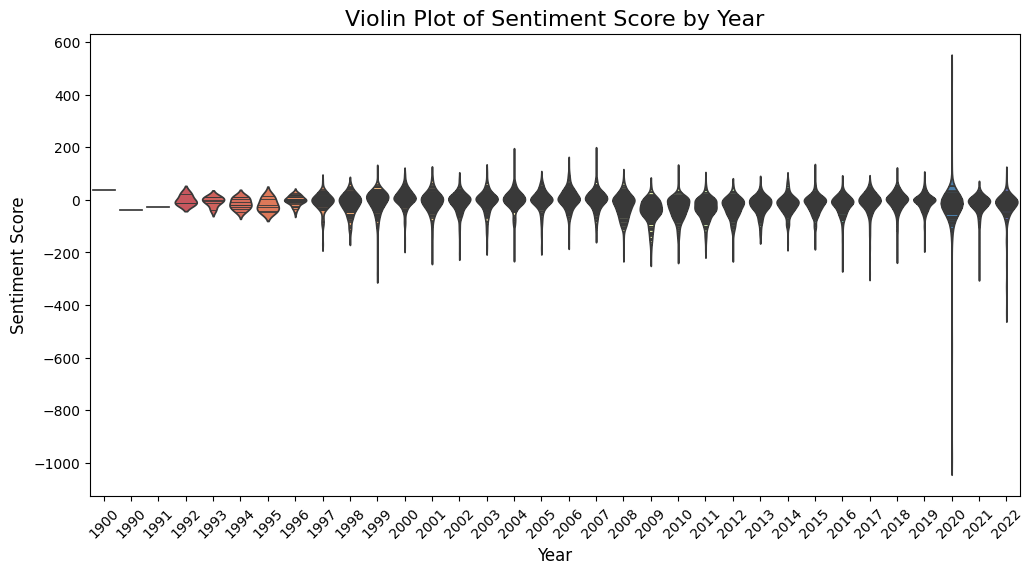

In [56]:
# Create the violin plot with colorful palette and different hues
plt.figure(figsize=(12, 6))
sns.violinplot(x='year', y='sentiment_score', data=speeches_df, 
               palette='Spectral', inner='stick', scale='width')

# Adding labels and title
plt.title('Violin Plot of Sentiment Score by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sentiment Score', fontsize=12)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Show the plot
plt.show()

**3.3.c Pairplot to visualise correlations**<br>
- sentiment_score
- year
- is_gov (for hue/marker differentiation)

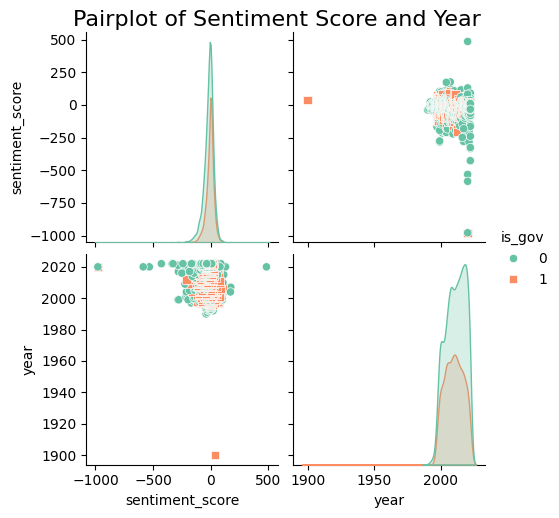

In [58]:
# Get the unique values of 'is_gov' to determine the number of markers
unique_values = speeches_df['is_gov'].unique()
num_unique_values = len(unique_values)

# Define your pairplot_columns
pairplot_columns = ['sentiment_score', 'year']

# Define enough markers for the unique values
markers = ['o', 's', 'D', 'X', '^', '<', '>']  # Adjust this list as needed

# Use the pairplot
sns.pairplot(speeches_df[pairplot_columns + ['is_gov']], hue='is_gov', palette='Set2', markers=markers[:num_unique_values])

# Adding a title
plt.suptitle('Pairplot of Sentiment Score and Year', fontsize=16, y=1.02)
plt.show()

**3.3.d IQR (Interquartile Range) Test for Outliers**<br>
The IQR method to detect outliers in numerical columns like sentiment_score and year.

In [60]:
# Calculate IQR for sentiment_score and year
Q1 = speeches_df[['sentiment_score', 'year']].quantile(0.25)
Q3 = speeches_df[['sentiment_score', 'year']].quantile(0.75)
IQR = Q3 - Q1

# Define outlier criteria
outliers = (speeches_df[['sentiment_score', 'year']] < (Q1 - 1.5 * IQR)) | (speeches_df[['sentiment_score', 'year']] > (Q3 + 1.5 * IQR))

# Identify and display rows with outliers
outlier_rows = speeches_df[outliers.any(axis=1)]
print(outlier_rows)

          reference        country       date  \
40     r970812a_BOA      australia 1997-08-12   
83     r030606a_BOA      australia 2003-06-06   
151    r110211a_BOA      australia 2011-02-11   
157    r110826a_BOA      australia 2011-08-26   
244    r190809a_BOA      australia 2019-08-09   
...             ...            ...        ...   
7369  r160926a_FOMC  united states 2016-09-26   
7389  r161202a_FOMC  united states 2016-12-02   
7404  r170404a_FOMC  united states 2017-04-04   
7452  r180403a_FOMC  united states 2018-04-03   
7576  r200227a_FOMC  united states 2020-02-27   

                                                  title      author  is_gov  \
40                                                       macfarlane       1   
83                                                       macfarlane       1   
151                                                         stevens       1   
157                                                         stevens       1   
244           Op

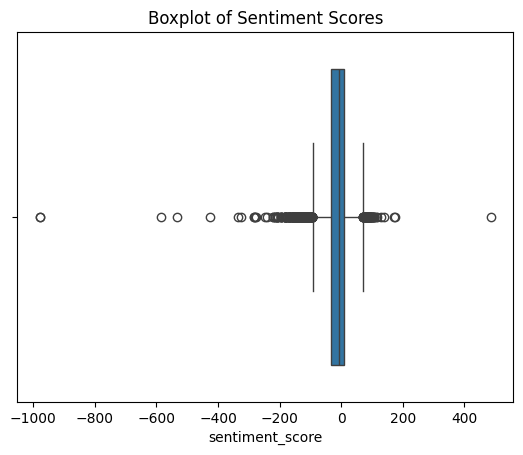

In [61]:
# Visualise the outliers in a boxplot to visually confirm the presence of outliers in sentiment_score or other numerical features.
sns.boxplot(x='sentiment_score', data=speeches_df)
plt.title('Boxplot of Sentiment Scores')
plt.show()

**3.3.e Skewness/Kurtosis**

In [63]:
skewness = speeches_df['sentiment_score'].skew()
kurtosis = speeches_df['sentiment_score'].kurtosis()
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")

Skewness: -3.861249948031232, Kurtosis: 66.84195249232052


**Observation**<br>
- Sentiment_score distribution is not normal.
- It has a lot of extreme outliers (especially on the negative side).
- Standard statistical tests assuming normality (like t-tests, simple linear regression without adjustments) might not be appropriate directly.

## 3.4. Statistical Analysis of Sentiment Analysis for Transformed sentiment score

**3.4.a Log transformation**

Transform the sentiment_score (e.g., log-transform, Box-Cox transform) to make it more normal-like.<br>
Since the data is negatively skewed, it is a good idea is to reflect it first (make it positive), then apply log transformation.

In [124]:
# Reflect the data (to deal with negative skew)
reflected_score = speeches_df['sentiment_score'].max() + 1 - speeches_df['sentiment_score']

# Apply log transformation
speeches_df['sentiment_score_log'] = np.log(reflected_score)

# Check skewness and kurtosis again
new_skewness = stats.skew(speeches_df['sentiment_score_log'])
new_kurtosis = stats.kurtosis(speeches_df['sentiment_score_log'], fisher=False)

print(f"New Skewness: {new_skewness:.4f}")
print(f"New Kurtosis: {new_kurtosis:.4f}")

New Skewness: -24.3956
New Kurtosis: 1451.9856


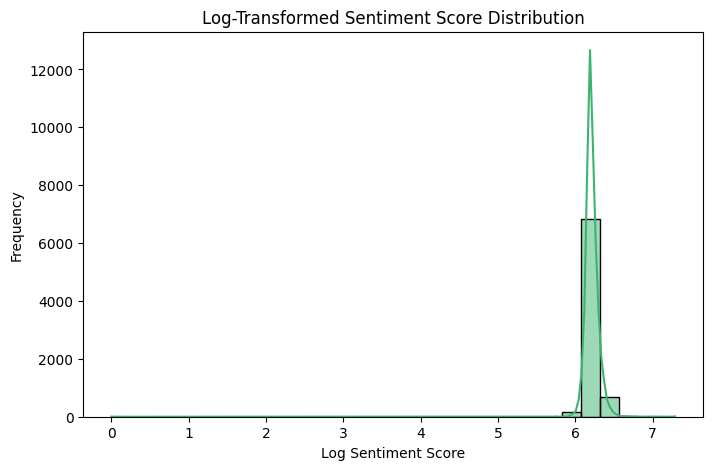

In [126]:
# Visualize the new distribution
plt.figure(figsize=(8,5))
sns.histplot(speeches_df['sentiment_score_log'], kde=True, color='mediumseagreen', bins=30)
plt.title('Log-Transformed Sentiment Score Distribution')
plt.xlabel('Log Sentiment Score')
plt.ylabel('Frequency')
plt.show()

**3.4.b Yeo-Johnson transformation**

Original sentiment_score has many zero or negative values (after reflection, some values might still cause issues with log so will use Yeo-Johnson transformation, which works for both positive and negative values ,no reflection needed, for better transformation.

In [136]:
# Create the transformer
pt = PowerTransformer(method='yeo-johnson')

# Fit and transform
speeches_df['sentiment_score_yeojohnson'] = pt.fit_transform(speeches_df[['sentiment_score']])

# Check again
new_skewness = stats.skew(speeches_df['sentiment_score_yeojohnson'])
new_kurtosis = stats.kurtosis(speeches_df['sentiment_score_yeojohnson'], fisher=False)

print(f"New Skewness: {new_skewness:.4f}")
print(f"New Kurtosis: {new_kurtosis:.4f}")

New Skewness: -0.1610
New Kurtosis: 41.0174


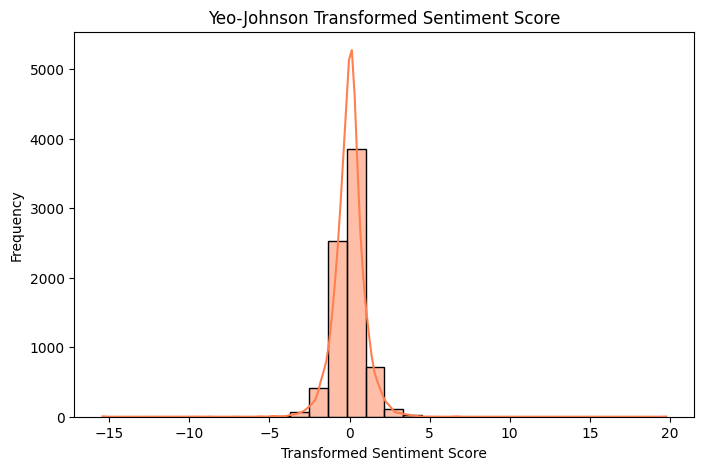

In [138]:
# Visualize the data
plt.figure(figsize=(8,5))
sns.histplot(speeches_df['sentiment_score_yeojohnson'], kde=True, color='coral', bins=30)
plt.title('Yeo-Johnson Transformed Sentiment Score')
plt.xlabel('Transformed Sentiment Score')
plt.ylabel('Frequency')
plt.show()

### 3.5. Conclusions

**Skewness**:<br>
-0.1610 → Very close to 0, meaning almost symmetric which is excellent.<br>
 <br>
**Kurtosis**:<br>
41.0174 → Still high, meaning heavy tails (extreme values/outliers still exist).<br>
 <br>
=> Accept it — some heavy-tailedness is natural in financial text/sentiment data.

## 4. Exploratory Sentiment Analysis for BoE Speeches only

### 4.1. Prepare the data

In [79]:
# Bank OF England (UK) Speeches Only  
boe_speeches = speeches_df_org[speeches_df_org['country'].str.lower() == 'united kingdom'].copy()

# View the Dataframe
boe_speeches.head()

reference         country       date  \
4961  r980915a_BOE  united kingdom 1998-09-15   
4962  r981021b_BOE  united kingdom 1998-10-21   
4963  r981021a_BOE  united kingdom 1998-10-21   
4964  r981101a_BOE  united kingdom 1998-11-01   
4965  r981101b_BOE  united kingdom 1998-11-01   

                                                  title   author  is_gov  \
4961                                             Speech   george       0   
4962                                  Britain in Europe   george       0   
4963  Impact of the recent turbulence in internation...     king       1   
4964        Economic policy, with and without forecasts     budd       0   
4965  Inflation targeting in practice: the UK experi...  vickers       0   

                                                   text year_month  year  \
4961  Thank you, Chairman. I'm actually very pleased...    1998-09  1998   
4962  It's a great pleasure to be here in the beauti...    1998-10  1998   
4963  Few industries have suffered more from volatil...    1998-10  1998   
4964  My topic this evening is the use of forecasts ...    1998-11  1998   
4965  Six years ago this week, sterling left the exc...    1998-11  1998   

      month  speech_length  
4961      9           2387  
4962     10           4045  
4963     10           2311  
4964     11           4690  
4965     11           4452

In [81]:
# is_gov (Edward George) 
# Clean author strings and initialise `is_gov`
boe_speeches["author"] = boe_speeches["author"].fillna("").str.strip()
boe_speeches["is_gov"] = boe_speeches["is_gov"].fillna(0)  

# Governor Sir Edward George held office 01‑Jul‑1993 → 30‑Jun‑2003
mask_george = (
    boe_speeches["author"].str.lower().str.contains("george")
    & (boe_speeches["date"] >= "1993-07-01")
    & (boe_speeches["date"] <= "2003-06-30")
)
boe_speeches.loc[mask_george, "is_gov"] = 1

# View the Dataframe
boe_speeches.head()

reference         country       date  \
4961  r980915a_BOE  united kingdom 1998-09-15   
4962  r981021b_BOE  united kingdom 1998-10-21   
4963  r981021a_BOE  united kingdom 1998-10-21   
4964  r981101a_BOE  united kingdom 1998-11-01   
4965  r981101b_BOE  united kingdom 1998-11-01   

                                                  title   author  is_gov  \
4961                                             Speech   george       1   
4962                                  Britain in Europe   george       1   
4963  Impact of the recent turbulence in internation...     king       1   
4964        Economic policy, with and without forecasts     budd       0   
4965  Inflation targeting in practice: the UK experi...  vickers       0   

                                                   text year_month  year  \
4961  Thank you, Chairman. I'm actually very pleased...    1998-09  1998   
4962  It's a great pleasure to be here in the beauti...    1998-10  1998   
4963  Few industries have suffered more from volatil...    1998-10  1998   
4964  My topic this evening is the use of forecasts ...    1998-11  1998   
4965  Six years ago this week, sterling left the exc...    1998-11  1998   

      month  speech_length  
4961      9           2387  
4962     10           4045  
4963     10           2311  
4964     11           4690  
4965     11           4452

In [83]:
# Text Pre-processing (clean & tokenise)

STOP_WORDS = set(stopwords.words('english'))

def clean(text: str) -> str:
    if not isinstance(text, str):
        return ''
    text = contractions.fix(text)  # Expand contractions i.e I'm not good goes to I am not good
    text = re.sub(r'\d+', ' ', text.lower())  # drop numerals
    text = re.sub(r'[^\w\s]', ' ', text)     # drop punctuation
    tokens = [t for t in word_tokenize(text) if t not in STOP_WORDS]
    return ' '.join(tokens)

boe_speeches['clean_text'] = boe_speeches['text'].apply(clean)

boe_speeches.head()

reference         country       date  \
4961  r980915a_BOE  united kingdom 1998-09-15   
4962  r981021b_BOE  united kingdom 1998-10-21   
4963  r981021a_BOE  united kingdom 1998-10-21   
4964  r981101a_BOE  united kingdom 1998-11-01   
4965  r981101b_BOE  united kingdom 1998-11-01   

                                                  title   author  is_gov  \
4961                                             Speech   george       1   
4962                                  Britain in Europe   george       1   
4963  Impact of the recent turbulence in internation...     king       1   
4964        Economic policy, with and without forecasts     budd       0   
4965  Inflation targeting in practice: the UK experi...  vickers       0   

                                                   text year_month  year  \
4961  Thank you, Chairman. I'm actually very pleased...    1998-09  1998   
4962  It's a great pleasure to be here in the beauti...    1998-10  1998   
4963  Few industries have suffered more from volatil...    1998-10  1998   
4964  My topic this evening is the use of forecasts ...    1998-11  1998   
4965  Six years ago this week, sterling left the exc...    1998-11  1998   

      month  speech_length                                         clean_text  
4961      9           2387  thank chairman actually pleased opportunity re...  
4962     10           4045  great pleasure beautiful city bruges honoured ...  
4963     10           2311  industries suffered volatility british economy...  
4964     11           4690  topic evening use forecasts economic policy ma...  
4965     11           4452  six years ago week sterling left exchange rate...

### 4.2. Sentiment Analysis

**4.2.a Lexicon-based sentiment analysis**

In [85]:
# Prepare the lexicon
sentiment_lexicon = pd.read_excel("LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist-2.xlsx")
categories = [
     "Negative",
     "Positive",
     "Uncertainty",
     "Litigious",
     "Strong",
     "Weak",
     "Constraining",
 ]
word_sets = {
    cat: set(sentiment_lexicon.loc[sentiment_lexicon[cat] == 1, "Word"].str.lower())
    for cat in categories
}

def lexicon_counts(text: str) -> pd.Series:
    tokens = re.findall(r"\b\w+\b", str(text).lower())
    return pd.Series({cat: sum(t in word_sets[cat] for t in tokens) for cat in categories})

boe_speeches = pd.concat(
    [boe_speeches, boe_speeches["text"].apply(lexicon_counts)], axis=1
 )
boe_speeches.head()

reference         country       date  \
4961  r980915a_BOE  united kingdom 1998-09-15   
4962  r981021b_BOE  united kingdom 1998-10-21   
4963  r981021a_BOE  united kingdom 1998-10-21   
4964  r981101a_BOE  united kingdom 1998-11-01   
4965  r981101b_BOE  united kingdom 1998-11-01   

                                                  title   author  is_gov  \
4961                                             Speech   george       1   
4962                                  Britain in Europe   george       1   
4963  Impact of the recent turbulence in internation...     king       1   
4964        Economic policy, with and without forecasts     budd       0   
4965  Inflation targeting in practice: the UK experi...  vickers       0   

                                                   text year_month  year  \
4961  Thank you, Chairman. I'm actually very pleased...    1998-09  1998   
4962  It's a great pleasure to be here in the beauti...    1998-10  1998   
4963  Few industries have suffered more from volatil...    1998-10  1998   
4964  My topic this evening is the use of forecasts ...    1998-11  1998   
4965  Six years ago this week, sterling left the exc...    1998-11  1998   

      month  speech_length                                         clean_text  \
4961      9           2387  thank chairman actually pleased opportunity re...   
4962     10           4045  great pleasure beautiful city bruges honoured ...   
4963     10           2311  industries suffered volatility british economy...   
4964     11           4690  topic evening use forecasts economic policy ma...   
4965     11           4452  six years ago week sterling left exchange rate...   

      Negative  Positive  Uncertainty  Litigious  Strong  Weak  Constraining  
4961        63        39           24          3      20    16             2  
4962        87        82           52          6      39    30            16  
4963        61        33           49          2      11    17             5  
4964        78        43           92         11      31    42            15  
4965       102        46          119         22      20    49            12

**4.2.b Vader based sentiment analysis**

In [89]:
# Vader Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()
vader_scores = boe_speeches['clean_text'].apply(sia.polarity_scores).apply(pd.Series)
boe_speeches = pd.concat([boe_speeches, vader_scores], axis=1)

boe_speeches.head()

reference         country       date  \
4961  r980915a_BOE  united kingdom 1998-09-15   
4962  r981021b_BOE  united kingdom 1998-10-21   
4963  r981021a_BOE  united kingdom 1998-10-21   
4964  r981101a_BOE  united kingdom 1998-11-01   
4965  r981101b_BOE  united kingdom 1998-11-01   

                                                  title   author  is_gov  \
4961                                             Speech   george       1   
4962                                  Britain in Europe   george       1   
4963  Impact of the recent turbulence in internation...     king       1   
4964        Economic policy, with and without forecasts     budd       0   
4965  Inflation targeting in practice: the UK experi...  vickers       0   

                                                   text year_month  year  \
4961  Thank you, Chairman. I'm actually very pleased...    1998-09  1998   
4962  It's a great pleasure to be here in the beauti...    1998-10  1998   
4963  Few industries have suffered more from volatil...    1998-10  1998   
4964  My topic this evening is the use of forecasts ...    1998-11  1998   
4965  Six years ago this week, sterling left the exc...    1998-11  1998   

      month  ...  Positive Uncertainty  Litigious  Strong  Weak  Constraining  \
4961      9  ...        39          24          3      20    16             2   
4962     10  ...        82          52          6      39    30            16   
4963     10  ...        33          49          2      11    17             5   
4964     11  ...        43          92         11      31    42            15   
4965     11  ...        46         119         22      20    49            12   

        neg    neu    pos  compound  
4961  0.140  0.688  0.172    0.9952  
4962  0.100  0.679  0.221    0.9998  
4963  0.107  0.717  0.176    0.9977  
4964  0.070  0.780  0.150    0.9996  
4965  0.090  0.774  0.135    0.9990  

[5 rows x 23 columns]

In [96]:
# VADER Sentiment Labelling
def label_vader(c, thr=0.05):
    if c >  thr:
        return "Positive"
    if c < -thr:
        return "Negative"
    return "Neutral"

boe_speeches["Sentiment Label (VADER)"] = boe_speeches["compound"].apply(label_vader)
boe_speeches.head()

reference         country       date  \
4961  r980915a_BOE  united kingdom 1998-09-15   
4962  r981021b_BOE  united kingdom 1998-10-21   
4963  r981021a_BOE  united kingdom 1998-10-21   
4964  r981101a_BOE  united kingdom 1998-11-01   
4965  r981101b_BOE  united kingdom 1998-11-01   

                                                  title   author  is_gov  \
4961                                             Speech   george       1   
4962                                  Britain in Europe   george       1   
4963  Impact of the recent turbulence in internation...     king       1   
4964        Economic policy, with and without forecasts     budd       0   
4965  Inflation targeting in practice: the UK experi...  vickers       0   

                                                   text year_month  year  \
4961  Thank you, Chairman. I'm actually very pleased...    1998-09  1998   
4962  It's a great pleasure to be here in the beauti...    1998-10  1998   
4963  Few industries have suffered more from volatil...    1998-10  1998   
4964  My topic this evening is the use of forecasts ...    1998-11  1998   
4965  Six years ago this week, sterling left the exc...    1998-11  1998   

      month  ...  Strong Weak  Constraining    neg    neu    pos  compound  \
4961      9  ...      20   16             2  0.140  0.688  0.172    0.9952   
4962     10  ...      39   30            16  0.100  0.679  0.221    0.9998   
4963     10  ...      11   17             5  0.107  0.717  0.176    0.9977   
4964     11  ...      31   42            15  0.070  0.780  0.150    0.9996   
4965     11  ...      20   49            12  0.090  0.774  0.135    0.9990   

      polarity  subjectivity  Sentiment Label (VADER)  
4961  0.083288      0.435206                 Positive  
4962  0.076868      0.368726                 Positive  
4963  0.091432      0.394993                 Positive  
4964  0.086707      0.476692                 Positive  
4965  0.058314      0.393456                 Positive  

[5 rows x 26 columns]

In [92]:
# Average VADER Sentiment per year
vader_yearly = (
    boe_speeches
      .groupby('year')[['compound', 'pos', 'neg', 'neu']]
      .mean()
      .round(3)           
                  
)

print("\nAverage VADER sentiment per year:")
vader_yearly


Average VADER sentiment per year:


compound    pos    neg    neu
year                               
1998     0.997  0.168  0.108  0.723
1999     0.932  0.176  0.099  0.725
2000     0.944  0.205  0.087  0.708
2001     0.943  0.182  0.104  0.714
2002     0.930  0.194  0.106  0.700
2003     0.788  0.181  0.102  0.717
2004     0.858  0.173  0.092  0.734
2005     0.995  0.166  0.091  0.743
2006     0.823  0.172  0.097  0.731
2007     0.884  0.177  0.096  0.727
2008     0.881  0.168  0.112  0.720
2009     0.682  0.179  0.122  0.699
2010     0.781  0.169  0.114  0.716
2011     0.586  0.162  0.119  0.718
2012     0.504  0.167  0.123  0.709
2013     0.956  0.181  0.102  0.716
2014     0.649  0.177  0.115  0.707
2015     0.763  0.176  0.105  0.719
2016     0.786  0.181  0.107  0.713
2017     0.699  0.179  0.100  0.721
2018     0.929  0.179  0.094  0.728
2019     0.700  0.180  0.098  0.723
2020     0.383  0.163  0.106  0.731
2021     0.864  0.160  0.088  0.752
2022     0.720  0.161  0.092  0.747

**4.2.c Polarity & Subjectivity Analysis**

In [98]:
# Textblob Polarity & subjectivity.
def generate_polarity_subjectivity(dfs):
    dft2 = TextBlob(dfs).sentiment
    return pd.Series([dft2[0], dft2[1]])

# Apply the function to the data and add two new columns
boe_speeches[['polarity','subjectivity']] = boe_speeches['text'].apply(generate_polarity_subjectivity)
boe_speeches.head()

reference         country       date  \
4961  r980915a_BOE  united kingdom 1998-09-15   
4962  r981021b_BOE  united kingdom 1998-10-21   
4963  r981021a_BOE  united kingdom 1998-10-21   
4964  r981101a_BOE  united kingdom 1998-11-01   
4965  r981101b_BOE  united kingdom 1998-11-01   

                                                  title   author  is_gov  \
4961                                             Speech   george       1   
4962                                  Britain in Europe   george       1   
4963  Impact of the recent turbulence in internation...     king       1   
4964        Economic policy, with and without forecasts     budd       0   
4965  Inflation targeting in practice: the UK experi...  vickers       0   

                                                   text year_month  year  \
4961  Thank you, Chairman. I'm actually very pleased...    1998-09  1998   
4962  It's a great pleasure to be here in the beauti...    1998-10  1998   
4963  Few industries have suffered more from volatil...    1998-10  1998   
4964  My topic this evening is the use of forecasts ...    1998-11  1998   
4965  Six years ago this week, sterling left the exc...    1998-11  1998   

      month  ...  Strong Weak  Constraining    neg    neu    pos  compound  \
4961      9  ...      20   16             2  0.140  0.688  0.172    0.9952   
4962     10  ...      39   30            16  0.100  0.679  0.221    0.9998   
4963     10  ...      11   17             5  0.107  0.717  0.176    0.9977   
4964     11  ...      31   42            15  0.070  0.780  0.150    0.9996   
4965     11  ...      20   49            12  0.090  0.774  0.135    0.9990   

      polarity  subjectivity  Sentiment Label (VADER)  
4961  0.083288      0.435206                 Positive  
4962  0.076868      0.368726                 Positive  
4963  0.091432      0.394993                 Positive  
4964  0.086707      0.476692                 Positive  
4965  0.058314      0.393456                 Positive  

[5 rows x 26 columns]

In [100]:
# TextBlob  (polarity & subjectivity) per year
tb_yearly = (
    boe_speeches
        .groupby("year")[["polarity", "subjectivity"]]   
        .mean()                                          
        .round(3)                                        
)

print("\nAverage TextBlob polarity & subjectivity per year:")
tb_yearly


Average TextBlob polarity & subjectivity per year:


polarity  subjectivity
year                        
1998     0.082         0.415
1999     0.091         0.407
2000     0.118         0.428
2001     0.099         0.421
2002     0.101         0.420
2003     0.098         0.417
2004     0.087         0.412
2005     0.093         0.429
2006     0.090         0.413
2007     0.097         0.413
2008     0.086         0.412
2009     0.087         0.406
2010     0.085         0.405
2011     0.085         0.415
2012     0.088         0.413
2013     0.100         0.419
2014     0.098         0.420
2015     0.104         0.418
2016     0.095         0.411
2017     0.106         0.415
2018     0.104         0.406
2019     0.111         0.416
2020     0.099         0.412
2021     0.098         0.418
2022     0.094         0.402

### 4.3. Visualisations

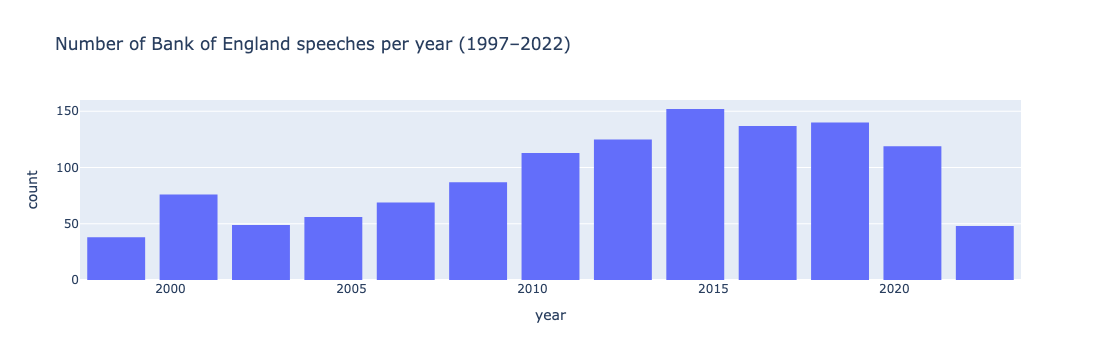

In [104]:
# Speech count per year
fig1 = px.histogram(
    boe_speeches,
    x="year",
    nbins=23,
    title="Number of Bank of England speeches per year (1997–2022)",
)
fig1.update_layout(bargap=0.2)
 
fig1.show()

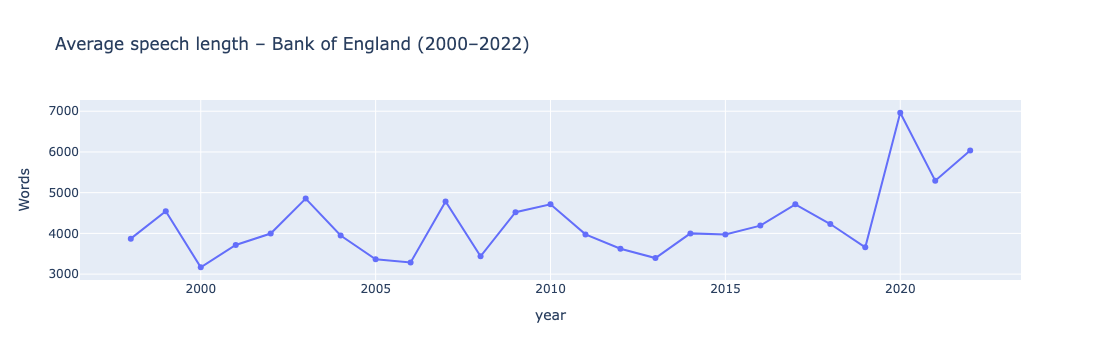

In [107]:
# Average speech length per year
length_by_year = (
     boe_speeches.groupby("year")["speech_length"].mean().reset_index()
)
fig2 = px.line(
     length_by_year,
     x="year",
     y="speech_length",
     title="Average speech length – Bank of England (2000–2022)",
     labels={"speech_length": "Words"},
)
fig2.update_traces(mode="lines+markers")
fig2.show()

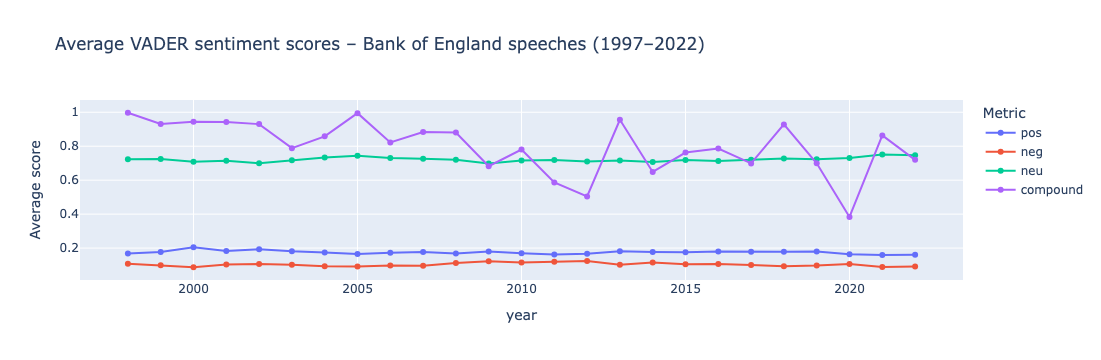

In [109]:
# Average VADER sentiment per year
vader_yearly = boe_speeches.groupby("year")[["pos", "neg", "neu", "compound"]].mean().reset_index()
fig3 = px.line(
     vader_yearly,
     x="year",
     y=["pos", "neg", "neu", "compound"],
     title="Average VADER sentiment scores – Bank of England speeches (1997–2022)",
     labels={"value": "Average score", "variable": "Metric"},
)
fig3.update_traces(mode="lines+markers")
fig3.show()

**Observations**:<br>
The full-panel VADER plot provides a richer decomposition of the Bank’s language. Across the entire 1997-2022 window the neutral share (green) hovers close to 0.70—evidence that most sentences remain informational, as one would expect from a central-bank charged with projecting authority and clarity. Within the residual 30 % of “sentiment-bearing” content, the positive fraction (blue, ≈ 0.16-0.21) consistently outweighs the negative fraction (red, ≈ 0.09-0.12), yielding a strongly positive compound score (violet) that rarely dips below 0.50. Yet those dips line up precisely with the key stress episodes highlighted in the project brief: a first slide in 2008-09 during the global-financial crisis, a second in 2011-12 amid euro-area tensions, and the deepest drop in 2020 when Covid-19 struck. Each time, the Bank’s speeches became less upbeat (falling compound, rising negative share), but the neutral component remained dominant, signalling that the institution continued to anchor expectations through factual, measured communication. The rapid rebounds in 2013-14 and again in 2021 also illustrate how the Bank modulates its tone upward as soon as macro-financial conditions stabilise, reinforcing its mandate to reassure markets while supporting the United Kingdom’s monetary and financial stability.

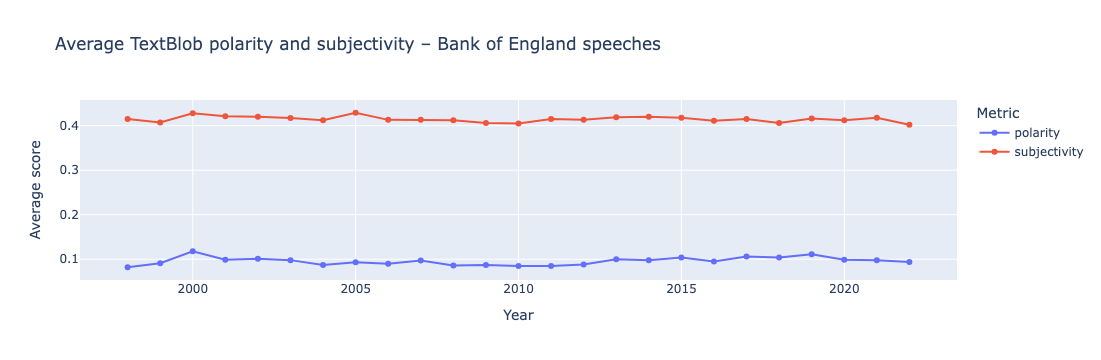

In [112]:
# Polarity & subjectivity 
fig_tb_combo = px.line(
    tb_yearly.reset_index(),            
    x="year",
    y=["polarity", "subjectivity"],
    title="Average TextBlob polarity and subjectivity – Bank of England speeches",
    labels={"value": "Average score", "variable": "Metric", "year": "Year"},
)
fig_tb_combo.update_traces(mode="lines+markers")
fig_tb_combo.show()

**Observations**:<br>
The TextBlob results confirm that, in fulfilling its mandate to “promote the good of the people of the United Kingdom by maintaining monetary and financial stability,” the Bank of England adopts a remarkably steady rhetorical stance. Average polarity (blue line) stays modestly positive—between ≈ 0.08 and 0.11—for the entire 1997-2022 sample, signalling a deliberately reassuring tone that fits the Bank’s role as an anchor for market expectations. The small but clear troughs in 2001-03 (post-dot-com slowdown), 2008-12 (global-financial and euro-area crises) and 2020 (COVID-19 shock) show that even this cautious measure registers periods of heightened concern, before rebounding as conditions stabilise—evidence that the Bank’s communications react to macro-financial stress but avoid excessive pessimism.

By contrast, subjectivity (orange line) hovers narrowly around 0.40-0.43 throughout. In practical terms this means that roughly 60 % of each speech is factual or data-driven while the remaining 40 % contains interpretative or forward-looking statements. The near-flat profile—barely affected by the crises noted above—suggests that, whatever the economic backdrop, the Bank maintains a consistent mix of analysis and judgement in its public messaging. This stylistic stability is fully aligned with its strategic objective: to provide markets and households with dependable guidance, neither overly technical nor unduly emotive, thereby supporting monetary-policy credibility and overall financial stability.

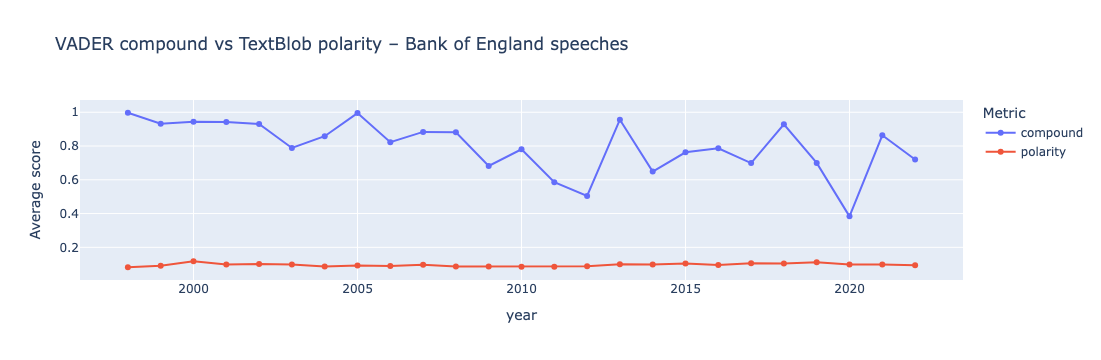

In [115]:
# Compound and Polarity 
combo = vader_yearly.merge(tb_yearly, on="year")

fig_combo = px.line(
    combo,
    x="year",
    y=["compound", "polarity"],
    title="VADER compound vs TextBlob polarity – Bank of England speeches",
    labels={"value": "Average score", "variable": "Metric"}
)
fig_combo.update_traces(mode="lines+markers")
fig_combo.show()

**Observations**: <br>
The combined plot of VADER compound (blue) and TextBlob polarity (red) summarises how the overall tone of Bank-of-England speeches has evolved since 1998. Although the two indices are reported on the same vertical axis, their scales differ: VADER’s non-linear formula pushes values close to +1 whenever positive language dominates, whereas TextBlob remains tightly compressed (≈ 0.07–0.12). For that reason we interpret the curves in terms of directional changes, not absolute height.

Both series move in lock-step: plateaus at high levels through the late-1990s and early-2000s; an unmistakable dip during the global-financial crisis (2007-09); a second trough in 2011-12 as euro-area turmoil intensified; and a sharp collapse in 2020 at the onset of the Covid-19 shock, followed by an incomplete rebound in 2021-22. The fact that the “quiet” polarity line tracks every rise and fall in the more volatile compound line confirms that the signal is real rather than a model artefact. In practical terms, VADER offers a high-resolution “early-warning” indicator, while TextBlob provides a stable baseline for long-run trend analysis. Taken together, the two metrics show that the Bank consistently adopts a mildly positive tone, yet still modulates that tone noticeably in response to major episodes of macro-financial stress, exactly as one would expect from an institution whose communications are meant to reassure markets while reflecting underlying economic realities.

### 4.4. Conclusion on Sentiment Analysis of Bank of England speeches

## 5. Exploratory Analysis for Correlation with Economic Indicators

Correlate with Inflation, GDP Merge UK macro data (ONS GDP growth, CPI, unemployment).

Calculate correlation coefficients.

Plot heatmap.

## 6. Insights & Recommendations